In [380]:
import pandas as pd
import matplotlib.pyplot as plt

In [381]:
df = pd.read_csv('./data/HR-hiring.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [382]:
df.left.isnull

<bound method Series.isnull of 0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64>

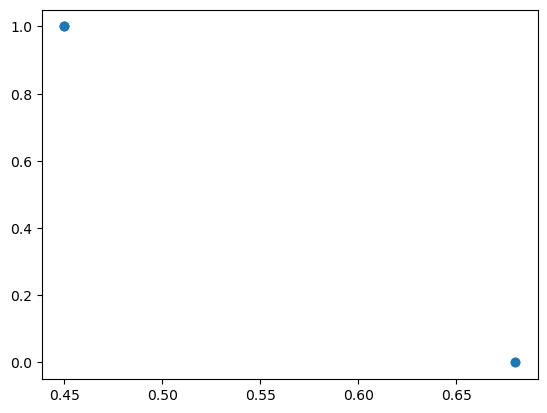

In [383]:
plt.scatter(df[(df.Department == 'sales') & (df.Work_accident >= 1) & (df.salary=='low') & (df.promotion_last_5years != 0)].satisfaction_level, df[(df.Department == 'sales') & (df.Work_accident >= 1) & (df.salary=='low')& (df.promotion_last_5years != 0)].left )

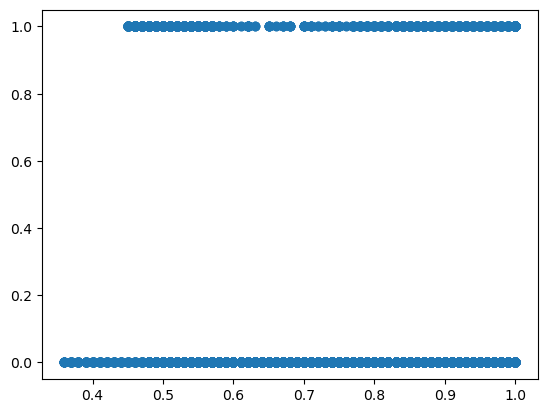

In [384]:
plt.scatter(df.last_evaluation, df.left)


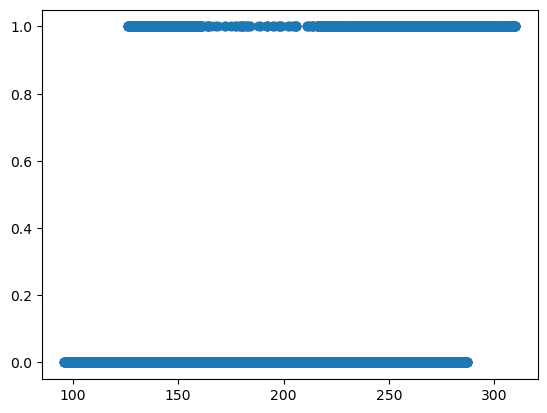

In [385]:
plt.scatter(df.average_montly_hours, df.left)

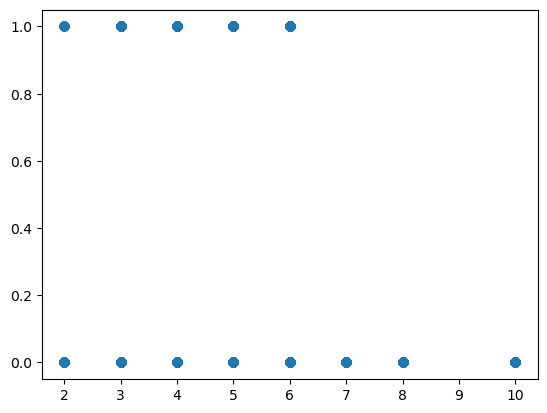

In [386]:
plt.scatter(df.time_spend_company, df.left)

In [387]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [388]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [389]:
dept = ohe.fit_transform(df[['Department']])
dept

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [390]:
df = pd.concat([df, dept], axis=1).drop(columns=['Department', 'Department_IT'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,medium,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,medium,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [391]:
salary_mapping = {'low': 0, 'medium': 1, 'high':2}
df.salary = df.salary.map(salary_mapping)

In [392]:
# salary = ohe.fit_transform(df[['salary']])
# df = pd.concat([salary, df], axis=1).drop(columns=['salary'])
df.dtypes

<bound method NDFrame.describe of        salary_high  salary_low  salary_medium  satisfaction_level  \
0              0.0         1.0            0.0                0.38   
1              0.0         0.0            1.0                0.80   
2              0.0         0.0            1.0                0.11   
3              0.0         1.0            0.0                0.72   
4              0.0         1.0            0.0                0.37   
...            ...         ...            ...                 ...   
14994          0.0         1.0            0.0                0.40   
14995          0.0         1.0            0.0                0.37   
14996          0.0         1.0            0.0                0.37   
14997          0.0         1.0            0.0                0.11   
14998          0.0         1.0            0.0                0.37   

       last_evaluation  number_project  average_montly_hours  \
0                 0.53               2                   157   
1        

In [393]:
X = df.drop(columns=['left'])
y = df.left

In [394]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [400]:
from sklearn.linear_model import LogisticRegression

salary_high               float64
salary_low                float64
salary_medium             float64
satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Department_RandD          float64
Department_accounting     float64
Department_hr             float64
Department_management     float64
Department_marketing      float64
Department_product_mng    float64
Department_sales          float64
Department_support        float64
Department_technical      float64
dtype: object

In [396]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/happypotter/anaconda3/envs/pylearn/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [397]:
lr.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [398]:
lr.score(X_test, y_test)

0.7933333333333333